# NM

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import fastai; fastai.__version__
print(fastai.__version__)
from fastai import *
from fastai.vision.all import * 
from fastai.tabular.all import *
from fastai.callback.all import *
from fastai.data import *
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import StratifiedKFold
from fastcore.foundation import L
from efficientnet_pytorch import EfficientNet
import collections

2.5.7


In [2]:
torch.cuda.set_device(0)
torch.cuda.current_device()

AttributeError: module 'torch._C' has no attribute '_cuda_setDevice'

In [3]:
bs = 16
img_size=96
n_splits = 5
lr=0.001
#np.random.seed(2)

In [4]:
#path="/media/df4-dafna/Rotem_Orad/NM_DL_forFastAI/"
#img_path="/media/df4-dafna/Rotem_Orad/NM_DL_forFastAI/images/"

#path= r'OneDrive/NM_DL_forFastAI/'
#img_path=r'OneDrive/NM_DL_forFastAI/images/'

In [5]:
pwd

'Z:\\Rotem_Orad'

In [78]:
path= r'NM_DL_forFastAI/'
img_path=r'NM_DL_forFastAI/images/'
df = pd.read_csv(path+'2class.csv')
print(df.head())
from efficientnet_pytorch import EfficientNet
model_name = 'efficientnet-b0'
def getModel(pret,**kwargs):
    model = EfficientNet.from_pretrained(model_name)
    model._fc = nn.Linear(model._fc.in_features,data.c)
    return model

               Image     Type
0  BEAT_0180_sl1.png  Control
1  BEAT_0180_sl2.png  Control
2  BEAT_0180_sl3.png  Control
3  BEAT_0185_sl1.png  Control
4  BEAT_0185_sl2.png  Control


# Data splitting

In [79]:
#Split the data between the training and the validation set to create an updated csv
df['Subject'] = df['Image'].str.split('_sl').str[0]
X = df['Subject']
y = df['Type']
groups = df['Type']

kf = StratifiedKFold(n_splits=n_splits, shuffle=False)

split_idx = 1
for train_index, test_index in kf.split(X, y, groups=groups):
    splitname = "split{}".format(split_idx)
    for train_idx in train_index: df.at[train_idx, splitname] = False
    for test_idx in test_index: df.at[test_idx, splitname] = True
    split_idx = split_idx + 1
df.to_csv(path+'data_5_fold.csv', index=False)

# Model Training 

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\rotemor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\rotemor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,1.457736,0.994744,0.448718,00:05
1,1.334264,0.899118,0.461538,00:05
2,1.152998,0.835015,0.641026,00:05
3,1.142673,1.163238,0.525641,00:05
4,1.071590,0.902385,0.628205,00:04
5,1.018714,0.959025,0.589744,00:05
6,0.955924,1.109942,0.589744,00:05
7,0.952642,1.001717,0.653846,00:05
8,0.931383,0.965701,0.628205,00:05
9,0.882723,0.837647,0.641026,00:04


Better model found at epoch 0 with accuracy value: 0.44871795177459717.
Better model found at epoch 1 with accuracy value: 0.4615384638309479.
Better model found at epoch 2 with accuracy value: 0.6410256624221802.
Better model found at epoch 7 with accuracy value: 0.6538461446762085.


epoch,train_loss,valid_loss,accuracy,time
0,0.771456,0.915299,0.666667,00:07
1,0.734849,0.844072,0.641026,00:07
2,0.782957,2.420092,0.730769,00:07
3,0.904578,2.126242,0.397436,00:07
4,0.804602,1.414138,0.525641,00:07
5,0.791916,0.596088,0.717949,00:07
6,0.725045,0.846865,0.692308,00:07
7,0.639059,0.859297,0.653846,00:07
8,0.604465,0.674244,0.692308,00:07
9,0.535635,0.581063,0.820513,00:07


Better model found at epoch 0 with accuracy value: 0.6666666865348816.
Better model found at epoch 2 with accuracy value: 0.7307692170143127.
Better model found at epoch 9 with accuracy value: 0.8205128312110901.
Better model found at epoch 11 with accuracy value: 0.8717948794364929.
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\rotemor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\rotemor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,1.369564,0.928355,0.576923,00:05
1,1.260868,0.948107,0.564103,00:05
2,1.150977,0.757516,0.589744,00:05
3,1.092663,0.673707,0.641026,00:05
4,1.033612,1.058187,0.576923,00:05
5,1.005454,0.661707,0.666667,00:05
6,0.983650,0.801189,0.628205,00:05
7,0.946423,0.813090,0.653846,00:05
8,0.947407,0.872326,0.602564,00:05
9,0.926320,0.813094,0.615385,00:05


Better model found at epoch 0 with accuracy value: 0.5769230723381042.
Better model found at epoch 2 with accuracy value: 0.5897436141967773.
Better model found at epoch 3 with accuracy value: 0.6410256624221802.
Better model found at epoch 5 with accuracy value: 0.6666666865348816.
Better model found at epoch 16 with accuracy value: 0.6794871687889099.


epoch,train_loss,valid_loss,accuracy,time
0,0.737872,0.585432,0.730769,00:07
1,0.743868,0.829137,0.705128,00:07
2,0.766141,1.516352,0.576923,00:08
3,0.798309,1.042323,0.692308,00:08
4,0.774098,0.794527,0.641026,00:07
5,0.705696,0.438031,0.833333,00:07
6,0.689773,0.492005,0.769231,00:07
7,0.631414,1.131848,0.564103,00:07
8,0.560940,1.205785,0.641026,00:07
9,0.501664,0.497431,0.807692,00:07


Better model found at epoch 0 with accuracy value: 0.7307692170143127.
Better model found at epoch 5 with accuracy value: 0.8333333134651184.
Better model found at epoch 12 with accuracy value: 0.8717948794364929.
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\rotemor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\rotemor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,1.235119,1.054662,0.423077,00:05
1,1.234385,0.833508,0.500000,00:04
2,1.193356,0.743589,0.641026,00:05
3,1.098488,1.020655,0.615385,00:05
4,1.083217,1.026255,0.653846,00:05
5,1.045578,0.971163,0.602564,00:05
6,0.989796,0.814729,0.666667,00:05
7,0.953394,1.083277,0.602564,00:05
8,0.940105,0.796704,0.666667,00:05
9,0.864823,0.756591,0.641026,00:05


Better model found at epoch 0 with accuracy value: 0.42307692766189575.
Better model found at epoch 1 with accuracy value: 0.5.
Better model found at epoch 2 with accuracy value: 0.6410256624221802.
Better model found at epoch 4 with accuracy value: 0.6538461446762085.
Better model found at epoch 6 with accuracy value: 0.6666666865348816.
Better model found at epoch 10 with accuracy value: 0.6794871687889099.


epoch,train_loss,valid_loss,accuracy,time
0,0.811742,0.804989,0.589744,00:07
1,0.778920,1.602219,0.692308,00:07
2,0.775746,1.532871,0.692308,00:07
3,0.862347,2.630966,0.666667,00:07
4,0.822906,1.353274,0.679487,00:07
5,0.738169,0.888316,0.653846,00:07
6,0.670646,0.640686,0.705128,00:07
7,0.599334,0.764670,0.756410,00:07
8,0.527443,0.667211,0.679487,00:07
9,0.491683,0.606319,0.743590,00:07


Better model found at epoch 0 with accuracy value: 0.5897436141967773.
Better model found at epoch 1 with accuracy value: 0.692307710647583.
Better model found at epoch 6 with accuracy value: 0.7051281929016113.
Better model found at epoch 7 with accuracy value: 0.7564102411270142.
Better model found at epoch 12 with accuracy value: 0.7948718070983887.
Better model found at epoch 16 with accuracy value: 0.807692289352417.
Better model found at epoch 17 with accuracy value: 0.8333333134651184.
Better model found at epoch 19 with accuracy value: 0.8461538553237915.
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\rotemor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\rotemor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,1.413119,0.740440,0.602564,00:05
1,1.387125,0.755645,0.589744,00:04
2,1.249698,0.701901,0.653846,00:04
3,1.198968,0.898185,0.653846,00:04
4,1.146074,0.909421,0.564103,00:05
5,1.063014,0.955761,0.628205,00:05
6,1.008266,0.995460,0.615385,00:05
7,0.989031,0.906441,0.615385,00:05
8,0.960397,1.051500,0.641026,00:04
9,0.907351,1.111140,0.628205,00:05


Better model found at epoch 0 with accuracy value: 0.6025640964508057.
Better model found at epoch 2 with accuracy value: 0.6538461446762085.
Better model found at epoch 13 with accuracy value: 0.7051281929016113.
Better model found at epoch 14 with accuracy value: 0.7179487347602844.
Better model found at epoch 15 with accuracy value: 0.7435897588729858.
Better model found at epoch 16 with accuracy value: 0.7692307829856873.


epoch,train_loss,valid_loss,accuracy,time
0,0.689732,0.784850,0.705128,00:07
1,0.656100,1.055192,0.615385,00:07
2,0.722205,1.253147,0.653846,00:07
3,0.842719,0.782680,0.756410,00:07
4,0.802773,0.977126,0.641026,00:07
5,0.744382,1.179664,0.615385,00:07
6,0.667977,0.666289,0.730769,00:07
7,0.609666,0.467125,0.782051,00:07
8,0.527387,0.895467,0.666667,00:07
9,0.470563,1.160564,0.705128,00:07


Better model found at epoch 0 with accuracy value: 0.7051281929016113.
Better model found at epoch 3 with accuracy value: 0.7564102411270142.
Better model found at epoch 7 with accuracy value: 0.7820512652397156.
Better model found at epoch 12 with accuracy value: 0.8333333134651184.
Better model found at epoch 13 with accuracy value: 0.8589743375778198.
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


C:\Users\rotemor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\rotemor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,1.325625,1.092817,0.384615,00:05
1,1.328908,0.900352,0.474359,00:04
2,1.166761,0.624410,0.641026,00:05
3,1.072725,0.716719,0.666667,00:04
4,1.044789,0.793560,0.653846,00:04
5,1.044287,0.841689,0.628205,00:05
6,1.012182,0.834053,0.615385,00:05
7,0.954411,0.661655,0.653846,00:04
8,0.918337,0.512804,0.769231,00:05
9,0.884149,0.483086,0.782051,00:04


Better model found at epoch 0 with accuracy value: 0.38461539149284363.
Better model found at epoch 1 with accuracy value: 0.4743589758872986.
Better model found at epoch 2 with accuracy value: 0.6410256624221802.
Better model found at epoch 3 with accuracy value: 0.6666666865348816.
Better model found at epoch 8 with accuracy value: 0.7692307829856873.
Better model found at epoch 9 with accuracy value: 0.7820512652397156.


epoch,train_loss,valid_loss,accuracy,time
0,0.676386,0.471347,0.769231,00:07
1,0.701147,0.974338,0.628205,00:07
2,0.767611,0.778735,0.756410,00:07
3,0.809047,0.835849,0.628205,00:07
4,0.835197,0.971937,0.602564,00:07
5,0.762717,0.683927,0.743590,00:07
6,0.714182,0.433867,0.858974,00:07
7,0.639258,0.587659,0.756410,00:07
8,0.565745,0.416714,0.807692,00:07
9,0.527955,0.380032,0.858974,00:07


Better model found at epoch 0 with accuracy value: 0.7692307829856873.
Better model found at epoch 6 with accuracy value: 0.8589743375778198.
Better model found at epoch 12 with accuracy value: 0.8974359035491943.


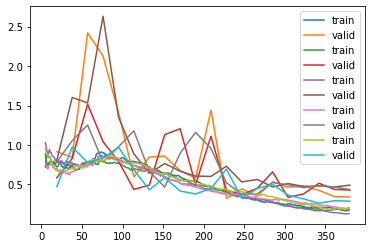

In [80]:
df = pd.read_csv(path+'data_5_fold.csv')
# Prepare the selected data_fold
for idx in range(1, n_splits+1):
    split_col = "split{}".format(idx)
    data = ImageDataLoaders.from_df(df, path=img_path, suffix='', batch_tfms = aug_transforms(size=img_size, xtra_tfms= Normalize.from_stats(*imagenet_stats)), bs=bs, splitter=ColSplitter(col=split_col))
    learn = cnn_learner(data, models.resnet18,metrics = accuracy).to_fp16()
    learn.fit_one_cycle(n_epoch=20, lr_max=lr, cbs=[SaveModelCallback(monitor='accuracy', reset_on_fit = True)]) # save the best model
    learn.unfreeze()
    learn.fit_one_cycle(n_epoch=20, lr_max=lr, cbs=[SaveModelCallback(monitor='accuracy', reset_on_fit = False)]) 
    learn.save('NM_model_{}'.format(idx))
    learn.recorder.plot_loss()


# Data visualising 

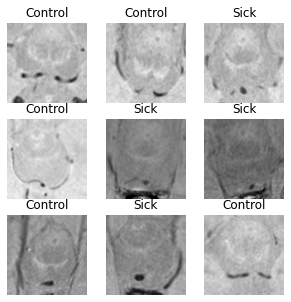

In [82]:
    data.show_batch(nrows=3, figsize=(5,5))

In [69]:
#Test Time Augmentation
# preds,targs = learn.TTA()
# accuracy(preds, targs).item()

# ROC

In [83]:
    preds,y, loss = learn.get_preds(with_loss=True)
    # get accuracy
    acc = accuracy(preds, y)
    print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.8974359035491943 %.


In [84]:
    from sklearn.metrics import roc_curve, auc
    # probs from log preds
    probs = np.exp(preds[:,1])
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

    # Compute ROC area
    roc_auc = auc(fpr, tpr)
    print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9457789979409746


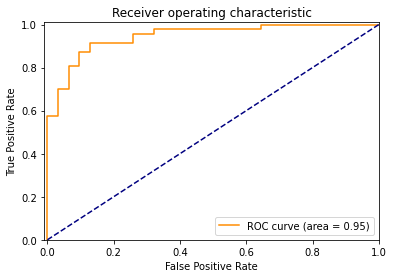

In [85]:
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('ROC_RGB.png')

# Model Evaluation

C:\Users\rotemor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\autocast_mode.py:162: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\rotemor\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


27 4 4 43


[]

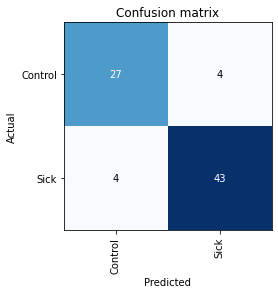

In [86]:
    interp = ClassificationInterpretation.from_learner(learn)
    interp.plot_confusion_matrix()
    plt.savefig('confusion_matrix_RGB_V.png')
    upp, low = interp.confusion_matrix()
    tn, fp = upp[0], upp[1]
    fn, tp = low[0], low[1]
    print(tn, fp, fn, tp)
    sensitivity = tp/(tp + fn)
    specificity = tn/(fp + tn)
    ppv = tp/(tp+fp)
    npv = tn/(tn+fn)
    interp.most_confused(min_val=5)

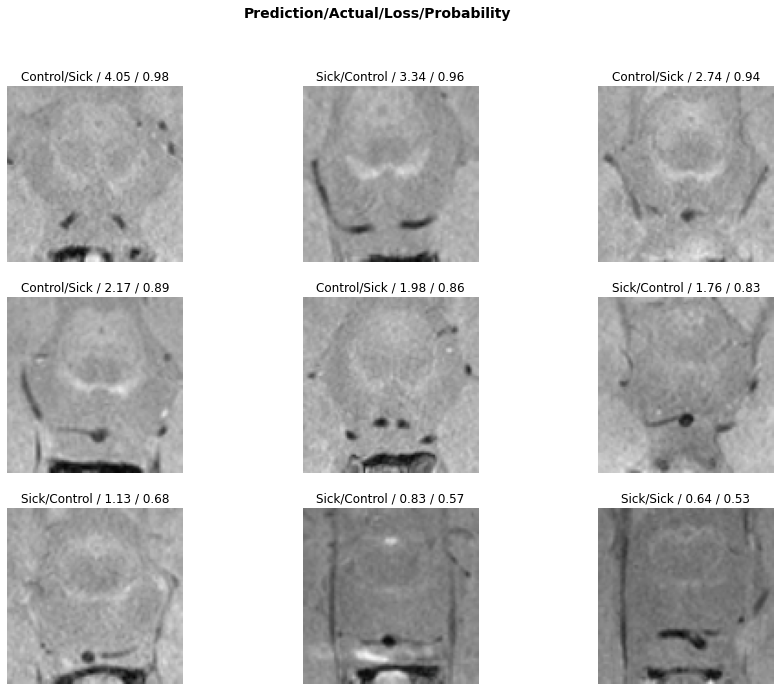

In [87]:
interp.plot_top_losses(25, figsize=(15,11))

# Inference on testdata

In [24]:
learn.load('NSCC_SCC_model');

In [25]:
# CLASS = 'tags'
# ID = 'image_name'

In [26]:
# path="/media/D/users/moran/work/Projects/SCC_NSCC/csv/T1/Test/"
# df_test = pd.read_csv(path+"test_labels.csv")

# test = (ImageList.from_df(df_test, path, suffix='.png')
#         .split_none()
#        .label_from_df(cols=CLASS)
#        .databunch(bs=8))

# # test.show_batch()

# predictions = []
# predictionsC = []
# trues = df_test[CLASS].tolist()
# for true, img in zip(trues, df_test[ID].tolist()):
#     prediction = learn.predict(open_image(path+img+'.png'))
#     predictions.append(1 if str(prediction[0]) == true else 0)
#     predictionsC.append(prediction)
# sum(predictions)/len(predictions)

In [27]:
# pred_id = np.argmax(np.array([a[2].cpu().numpy() for a in predictionsC]), axis=1)
# class_id = ['NSCC', 'SCC']
# cladd_id_dict = dict([(i,a) for (a,i) in enumerate(class_id)])
# trues_id = np.array([cladd_id_dict[a] for a in trues])

# from sklearn.metrics import confusion_matrix
# cf = confusion_matrix(pred_id, trues_id)
# cf


In [28]:
# from mlxtend.plotting import plot_confusion_matrix
# import matplotlib.pyplot as plt
# import numpy as np

# binary1 = np.array(cf)

# fig, ax = plot_confusion_matrix(conf_mat=binary1)
# plt.show()
# plt.savefig('confusion_matrix_RGB_T.png')